# BDML Lab 4

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Task 4.1 - SVM

0.9722222222222222


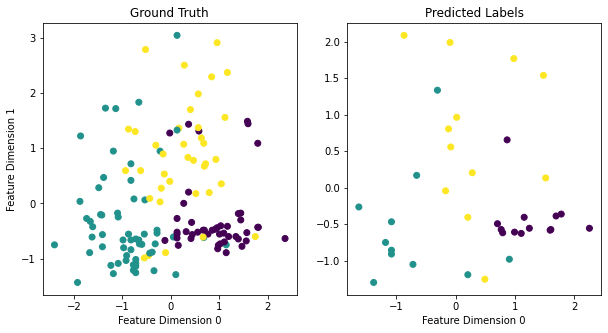

In [25]:
wine_data = np.load("wineData.npy")
wine_labels = np.load("wineLabels.npy")

X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)

y_labels = y_tst
scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)
svc = SVC(kernel="linear")
svc.fit(X_trn, y_trn)
y_tst = svc.predict(X_tst)

score = svc.score(X_tst, y_labels)
print(score)

plt.figure(figsize=[10,5])

plt.subplot(121)
plt.scatter(X_trn[:,0], X_trn[:,1], c=y_trn)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')

plt.show()

# Task 4.2 Neural Network for Wine Data


In [105]:
X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)
scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(np.unique(y_trn)), activation=tf.nn.softmax)])


model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(X_trn, y_trn, epochs=100, validation_split=0.2, verbose=0) 


In [27]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 56        
                                                                 
 dense_19 (Dense)            (None, 6)                 30        
                                                                 
 dense_20 (Dense)            (None, 10)                70        
                                                                 
 dense_21 (Dense)            (None, 3)                 33        
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


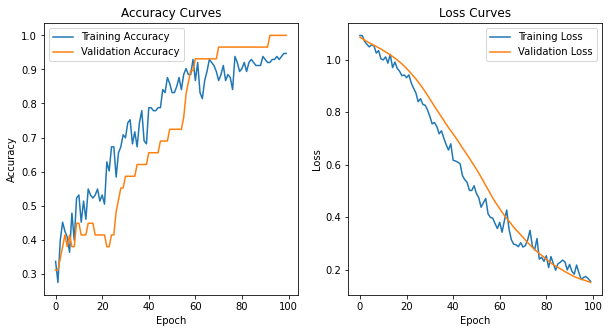

In [106]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [107]:
results = model.evaluate(X_tst, y_tst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 4ms/step - loss: 0.2901 - sparse_categorical_accuracy: 0.8611
Test set loss: 0.29, test set accuracy: 86.11%


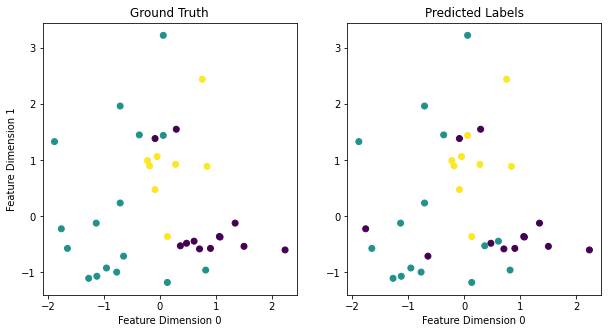

In [108]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_tst[:,0], X_tst[:,1], c=y_tst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_tst[:,0], X_tst[:,1], c=np.argmax(model.predict(X_tst), axis=1))
plt.show()

# Task 4.3 MNIST Neural Network

In [143]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

60000 train samples
10000 test samples
(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


Flatten and normalise data:

In [145]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [173]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(units=128, input_shape=(784,) ,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])



model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=tf.keras.metrics.CategoricalAccuracy())

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1) 

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8836 - categorical_accuracy: 0.7175 - val_loss: 0.4455 - val_categorical_accuracy: 0.8727
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4065 - categorical_accuracy: 0.8811 - val_loss: 0.3441 - val_categorical_accuracy: 0.9008
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3428 - categorical_accuracy: 0.9011 - val_loss: 0.3152 - val_categorical_accuracy: 0.9079
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3097 - categorical_accuracy: 0.9095 - val_loss: 0.2712 - val_categorical_accuracy: 0.9202
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2804 - categorical_accuracy: 0.9188 - val_loss: 0.2685 - val_categorical_accuracy: 0.9204
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2528 - categorical_accuracy: 0.9268 - val_loss: 0.2270 - val_categorical_accuracy:

# Analysis

In [175]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1691 - categorical_accuracy: 0.9501
Test Loss: 0.16905994713306427, Test Accuracy: 0.9501000046730042


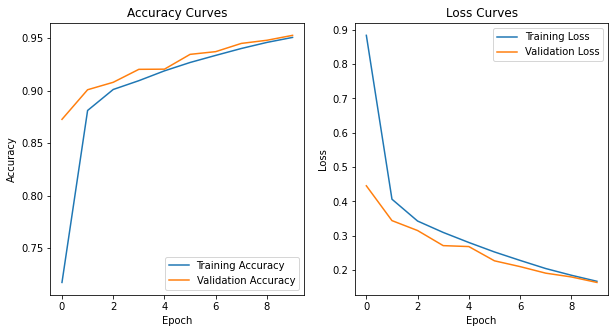

In [177]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Task 4.4 - MNIST CNN

In [180]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [181]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1600)            

In [185]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 20s 45ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0280 - val_accuracy: 0.9920
Epoch 2/15
422/422 [==============================] - 18s 44ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0288 - val_accuracy: 0.9918
Epoch 3/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0265 - val_accuracy: 0.9928
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0283 - val_accuracy: 0.9918
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 6/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0258 - val_accuracy: 0.9932
Epoch 7/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0265 - val_accuracy:

In [189]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022552305832505226
Test accuracy: 0.9939000010490417


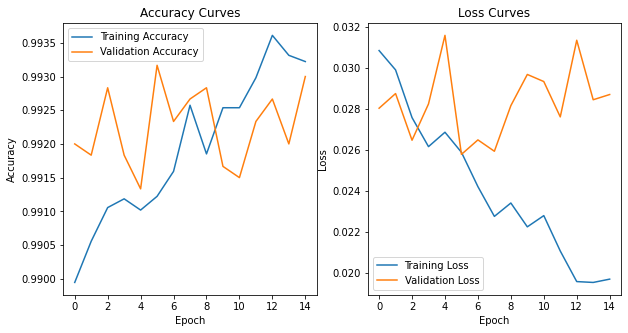

In [190]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()